# Wrangling the Range

In this activity, you’ll calculate a range of possible performance outcomes by using confidence intervals and the related z-scores.

Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `V` (Visa)

    - `SQ` (Square, Inc.)

    - `GS` (Goldman Sachs)
 
> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_bars` function to make the API call. Be sure to set the `df` property at the end of the `get_bars` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

> **Hint** Use both the head and tail functions to display the first five and the last five rows of the DataFrame. You need the price of each stock on the last day of the period for later use in your confidence interval calculations.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all four stocks.

9. Based on your calculations and plots, answer the following questions: Which is the least volatile stock in the group? Which is the most volatile?

10. With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

11. With a 99% level of confidence, calculate the downside and upside performance expectations for both SQ and GS based on the mean and standard deviation values. 

12. Identify the lower and upper performance bounds for the start of each tail for SPY and SQ stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)



## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY') 

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 

In [5]:
# Create the list for the required tickers
tickers = ['SPY', 'V', 'TSLA', 'GS']

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp('2022-12-3', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-3', tz='America/New_York').isoformat()


In [7]:
# Set timeframe to one day (1Day)
timeframe = '1Day'

In [8]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
V = prices_df[prices_df['symbol']=='V'].drop('symbol', axis=1)
TSLA = prices_df[prices_df['symbol']=='TSLA'].drop('symbol', axis=1)
GS = prices_df[prices_df['symbol']=='GS'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, V, TSLA, GS], axis=1, keys=["SPY", "V", "TSLA", "GS"])

# Review the first five rows of the resulting DataFrame 
display(prices_df.head())
display(prices_df.tail())

SPY                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2022-12-05 05:00:00+00:00  399.59  404.93  398.1700      553485  403.95   
2022-12-06 05:00:00+00:00  393.83  399.99  391.6400      613994  399.42   
2022-12-07 05:00:00+00:00  393.16  395.64  391.9700      486280  392.94   
2022-12-08 05:00:00+00:00  396.24  397.36  393.2684      463709  395.14   
2022-12-09 05:00:00+00:00  393.28  397.62  393.1500      483853  394.94   

                                                      V                    \
                             volume        vwap   close      high     low   
timestamp                                                                   
2022-12-05 05:00:00+00:00  77289815  401.472090  213.68  216.9099  213.05   
2022-12-06 05:00:00+00:00  77972217  394.834705  209.08  212.1300  207.64   
2022-12-07 05:00:00+00:00  65927896  393.437192  207.81  209.0153  205.13   
2022-12-08 05:00:00+00:00  60737912  395.706284  209.10  210.3000  207.75   
2022-12-09 05:00:00+00:00  81353584  395.189653  208.70  210.5200  207.52   

                           ...     TSLA                             GS  \
                           ...     open     volume        vwap   close   
timestamp                  ...                                           
2022-12-05 05:00:00+00:00  ...  189.440   95180598  184.636732  371.54   
2022-12-06 05:00:00+00:00  ...  181.215   93840008  178.561669  362.91   
2022-12-07 05:00:00+00:00  ...  175.030   86103119  174.176362  359.92   
2022-12-08 05:00:00+00:00  ...  172.200   99166137  172.300832  358.08   
2022-12-09 05:00:00+00:00  ...  173.840  106899809  179.472629  359.14   

                                                                          \
                             high       low trade_count    open   volume   
timestamp                                                                  
2022-12-05 05:00:00+00:00  378.87  369.3100       45463  378.55  2329570   
2022-12-06 05:00:00+00:00  370.37  360.3300       70193  369.48  3081920   
2022-12-07 05:00:00+00:00  365.30  358.1500       46475  362.49  2128204   
2022-12-08 05:00:00+00:00  362.59  356.0550       41196  362.03  1967822   
2022-12-09 05:00:00+00:00  361.64  356.2138       32998  356.71  1588374   

                                       
                                 vwap  
timestamp                              
2022-12-05 05:00:00+00:00  371.772291  
2022-12-06 05:00:00+00:00  363.867263  
2022-12-07 05:00:00+00:00  360.879635  
2022-12-08 05:00:00+00:00  358.322529  
2022-12-09 05:00:00+00:00  359.290575  

[5 rows x 28 columns]

SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2023-11-27 05:00:00+00:00  454.48  455.4901  454.0799      400700  454.65   
2023-11-28 05:00:00+00:00  454.93  456.2700  453.5000      461132  454.08   
2023-11-29 05:00:00+00:00  454.61  458.3200  454.2000      455449  457.15   
2023-11-30 05:00:00+00:00  456.40  456.7600  453.3400      516019  455.48   
2023-12-01 05:00:00+00:00  459.10  459.6500  455.1600      605281  455.77   

                                                      V                   ...  \
                             volume        vwap   close     high     low  ...   
timestamp                                                                 ...   
2023-11-27 05:00:00+00:00  50505987  454.828885  254.14  254.980  252.52  ...   
2023-11-28 05:00:00+00:00  62115013  454.721790  252.94  254.150  251.61  ...   
2023-11-29 05:00:00+00:00  63145994  455.817869  254.23  256.065  253.52  ...   
2023-11-30 05:00:00+00:00  79752702  455.145660  256.68  256.770  253.17  ...   
2023-12-01 05:00:00+00:00  89147486  457.871367  256.45  256.910  253.90  ...   

                             TSLA                             GS            \
                             open     volume        vwap   close      high   
timestamp                                                                    
2023-11-27 05:00:00+00:00  236.89  112057261  235.622755  337.71  340.0200   
2023-11-28 05:00:00+00:00  236.68  148648582  241.131927  337.65  338.3999   
2023-11-29 05:00:00+00:00  249.21  135445276  248.050984  340.26  343.5300   
2023-11-30 05:00:00+00:00  245.14  132457365  240.686891  341.54  344.7550   
2023-12-01 05:00:00+00:00  233.14  121207336  236.476332  348.43  348.8900   

                                                                            
                              low trade_count    open   volume        vwap  
timestamp                                                                   
2023-11-27 05:00:00+00:00  335.74       27433  339.19  1250573  337.575162  
2023-11-28 05:00:00+00:00  334.87       30399  337.38  1418977  337.111796  
2023-11-29 05:00:00+00:00  336.51       42979  337.00  2038125  340.284263  
2023-11-30 05:00:00+00:00  340.09       36115  341.68  1903756  342.001967  
2023-12-01 05:00:00+00:00  340.42       43778  341.46  3622817  347.411643  

[5 rows x 28 columns]

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [10]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    closing_prices_df[ticker] = prices_df[ticker]['close']

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())

,SPY,V,TSLA,GS
2022-12-05,399.59,213.68,182.45,371.54
2022-12-06,393.83,209.08,179.82,362.91
2022-12-07,393.16,207.81,174.04,359.92
2022-12-08,396.24,209.10,173.44,358.08
2022-12-09,393.28,208.70,179.05,359.14


,SPY,V,TSLA,GS
2023-11-27,454.48,254.14,236.08,337.71
2023-11-28,454.93,252.94,246.72,337.65
2023-11-29,454.61,254.23,244.14,340.26
2023-11-30,456.40,256.68,240.08,341.54
2023-12-01,459.10,256.45,238.83,348.43


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [11]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,SPY,V,TSLA,GS
2022-12-06,-0.014415,-0.021528,-0.014415,-0.023228
2022-12-07,-0.001701,-0.006074,-0.032143,-0.008239
2022-12-08,0.007834,0.006208,-0.003447,-0.005112
2022-12-09,-0.007470,-0.001913,0.032345,0.002960
2022-12-12,0.014417,0.028222,-0.062720,0.011249


,SPY,V,TSLA,GS
2023-11-27,-0.001801,-0.000629,0.002676,-0.004246
2023-11-28,0.000990,-0.004722,0.045069,-0.000178
2023-11-29,-0.000703,0.005100,-0.010457,0.007730
2023-11-30,0.003937,0.009637,-0.016630,0.003762
2023-12-01,0.005916,-0.000896,-0.005207,0.020173


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [14]:
# Generate the summary statistics for the daily return DataFrame
daily_returns_df.describe()

,SPY,V,TSLA,GS
count,249.000000,249.000000,249.000000,249.000000
mean,0.000596,0.000785,0.001744,-0.000147
std,0.008768,0.010179,0.036405,0.014917
min,-0.024462,-0.028969,-0.122422,-0.064385
25%,-0.004981,-0.006466,-0.017551,-0.008601
50%,0.000504,0.001643,0.001871,0.000170
75%,0.006506,0.006219,0.021729,0.008767
max,0.022932,0.031453,0.110002,0.044174


## Step 8: Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Stock Daily Returns'}, ylabel='Frequency'>

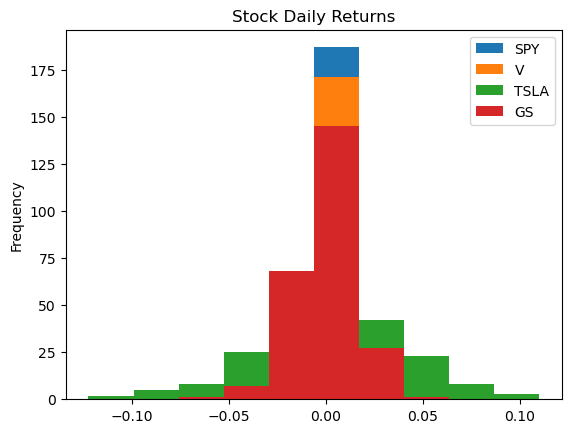

In [15]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size 
daily_returns_df.plot.hist(
    title='Stock Daily Returns'
)

<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

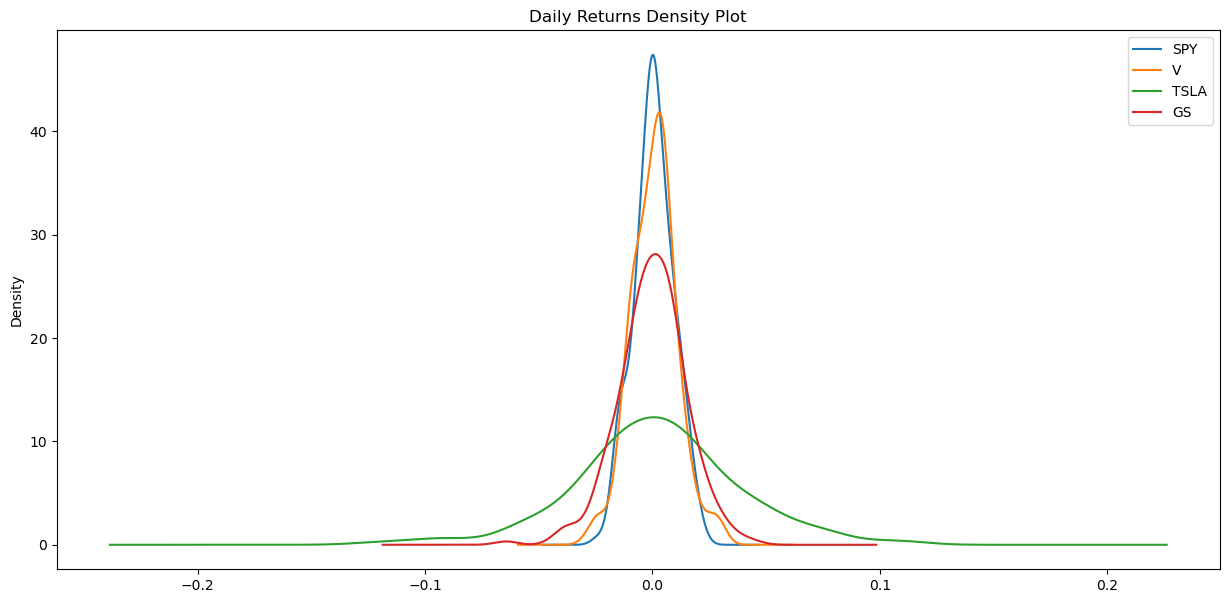

In [16]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size 
daily_returns_df.plot.density(
    figsize=(15,7), 
    title="Daily Returns Density Plot"
)

## Step 9: Answer the following question. 

**Question:** Which is the least volatile stock in the group? Which is the most volatile?
    
**Answer:** Thus far, TSLA has been the most volatile, which makes sense given the controversy that Elon Musk has been stirring up of late. The least volatile is the SPY index, due to the fact that it is an amalgamation of stocks, the diversity of which acts as a hedge.  

## Step 10: With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

In [17]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Calculate the upside and downside performance expectations using a 95% confidence interval.
# The z-score associated with a 95% confidence interval is 1.96.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_SPY = 0.000596 - (1.96 * 0.008768)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_SPY = 0.000596 + (1.96 * 0.008768)

# Print the expected range of SPY's performance
print(float(downside_SPY))
print(float(upside_SPY))

-0.01658928
0.01778128


In [18]:
# Based on the daily return summary statistics, access the mean and standard deviation
# values for stock Visa (ticker: V)
# Calculate the upside and downside performance expectations using a 95% confidence interval
# The z-score associated with a 95% confidence interval is 1.96

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_V = 0.000785 - (1.96 * 0.010179)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_V = 0.000785 + (1.96 * 0.010179)

# Print the expected range of Visa's performance
print(float(downside_V))
print(float(upside_V))

-0.01916584
0.020735840000000002


## Step 11: With a 99% level of confidence, calculate the downside and upside performance expectations for both TSLA and GS based on the mean and standard deviation values. 

In [20]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for TSLA (ticker: TSLA). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_TSLA = 0.001744 - (1.96 * 0.036405)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_TSLA = 0.001744 + (1.96 * 0.036405)

# Print the expected range of Tesla's performance.
print(float(downside_TSLA))
print(float(upside_TSLA))

-0.0696098
0.07309779999999999


In [22]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for Goldman Sachs (ticker: GS). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_GS = -0.000147 - (1.96 * 0.014917)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_GS = -0.000147 + (1.96 * 0.014917)

# Print the expected range of Goldman Sach's performance.
print(float(downside_GS))
print(float(upside_GS))

-0.02938432
0.029090319999999996


In [24]:
display(closing_prices_df.tail())
display(daily_returns_df.describe())

,SPY,V,TSLA,GS
2023-11-27,454.48,254.14,236.08,337.71
2023-11-28,454.93,252.94,246.72,337.65
2023-11-29,454.61,254.23,244.14,340.26
2023-11-30,456.40,256.68,240.08,341.54
2023-12-01,459.10,256.45,238.83,348.43


,SPY,V,TSLA,GS
count,249.000000,249.000000,249.000000,249.000000
mean,0.000596,0.000785,0.001744,-0.000147
std,0.008768,0.010179,0.036405,0.014917
min,-0.024462,-0.028969,-0.122422,-0.064385
25%,-0.004981,-0.006466,-0.017551,-0.008601
50%,0.000504,0.001643,0.001871,0.000170
75%,0.006506,0.006219,0.021729,0.008767
max,0.022932,0.031453,0.110002,0.044174


## Step 12: Identify the lower and upper performance bounds for the start of each tail for SPY and TSLA stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.

In [26]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Identify the lower and upper bounds associated with the tail risk measures
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_SPY = 0.000596 - (3 * 0.008768)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_SPY = 0.000596 + (3 * 0.008768)

# Print the expected range of the SPY's performance
print(float(downside_tail_SPY))
print(float(upside_tail_SPY))

-0.025708
0.0269


In [27]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for Tesla (ticker: TSLA). 
# Identify the lower and upper bounds associated with the tail risk measures. 
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3 

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_TSLA = 0.001744 - (3 * 0.036405)

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_TSLA = 0.001744 + (3 * 0.036405)

# Print the expected range of Tesla's performance
print(float(downside_tail_TSLA))
print(float(upside_tail_TSLA))

-0.10747100000000001
0.110959
